IMPORTING PACKAGES

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression

from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

LOADING THE DATA

In [132]:
train_data = pd.read_csv('train_set.csv') 
test_data = pd.read_csv('test_set.csv') 

SHOWING THE DATA

In [133]:
train_data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [134]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


Checking how many columns and rows does train and test dataframe have

In [135]:
train_data.shape
print(f'{train_data.shape[0]} rows and {train_data.shape[1]} columns') 

33000 rows and 2 columns


In [136]:
train_data.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [137]:
train_data['lang_id'].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='lang_id'>

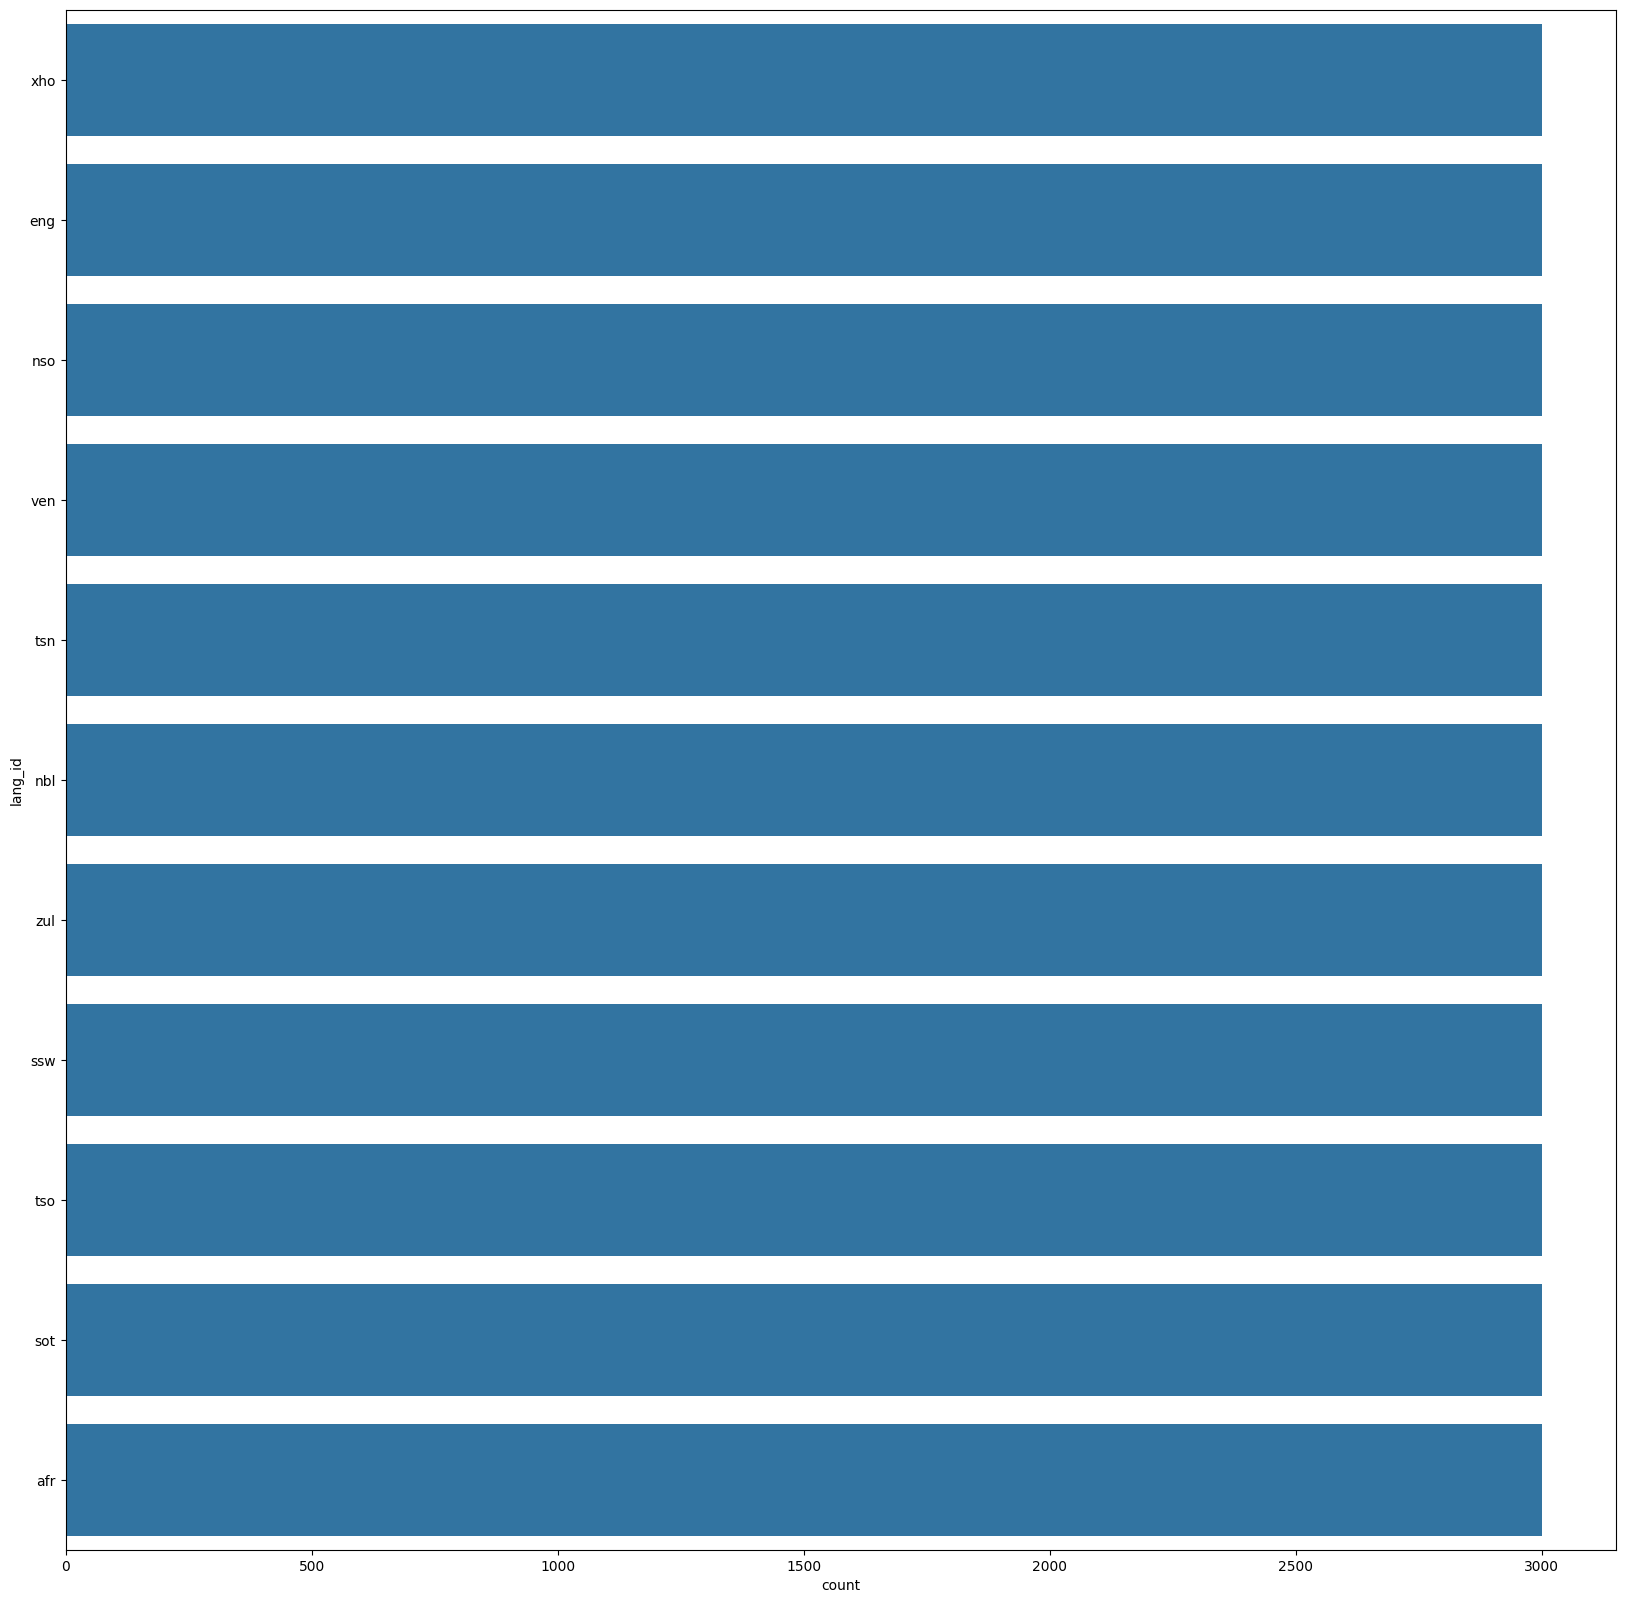

In [138]:
plt.figure(figsize=(20, 20))
sns.countplot(train_data['lang_id'])

Remove stopwords from sentences

In [144]:
ps = PorterStemmer()
rm=[]

for i in range(len(train_data["text"])): 

    rev = re.sub("^[a-zA-Z]", " ", train_data["text"][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = " ".join(rev)
    rm.append(rev)
    print(f'{i}')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Convert sentences into vector

In [ ]:
cv = CountVectorizer(max_features=10000)
x = cv.fit_transform(rm).toarray()

In [ ]:
x.shape

(1404, 10000)

In [ ]:
label = LabelEncoder()
y = label.fit_transform(train_data["lang_id"])
y

array([9, 9, 1, ..., 1, 9, 4])

In [ ]:
label.classes_

array(['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven',
       'xho', 'zul'], dtype=object)

Final Data

In [ ]:
data1 = pd.DataFrame(np.c_[rm, y],columns=['Sentence', 'Language'])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 58 and the array at index 1 has size 33000

In [ ]:
data1

NameError: name 'data1' is not defined

Split the data into training and testing

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [1404, 33000]

In [142]:
x_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'x_train' is not defined

Define and test the Model

In [ ]:
classifier = MultinomialNB().fit(x_train, y_test)

In [ ]:
predict = classifier.predict(X_test)

In [143]:
predict

NameError: name 'predict' is not defined

In [ ]:
y_test

Assess the model

In [ ]:
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

Confusion Matrix

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap=plt.cm.Accent)

NameError: name 'y_test' is not defined

<Figure size 2500x2500 with 0 Axes>

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_train)

NameError: name 'x_train' is not defined

## Predicted Language

In [ ]:
fnl = pd.DataFrame(np.c_[y_test,predict],columns=['Actual','Predicted'])
fnl

## Save model

In [ ]:
import joblib

joblib.dump(classifier , 'language_identification.sav')

## Load model

In [ ]:
model = joblib.load('language_identification.sav')

In [ ]:
train_data.head()

## Test model

In [ ]:
def test_model(test_sentence):
    languages = {
    'eng' : 0,
    'nso' : 1,
    'ven' : 2,
    'tsn' : 3,
    'nbl' : 4,
    'zul' : 5,
    ssw' : 6,
    'ssw' : 7,
    'tso' : 8,
    'sot' : 9,
    'afr' : 10,
    }
    
    xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
    
    
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    
    output = model.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    
    print(output)

In [ ]:
submission = train_data["lang_id"]
submission

0        xho
1        xho
2        eng
3        nso
4        ven
        ... 
32995    tsn
32996    sot
32997    eng
32998    xho
32999    sot
Name: lang_id, Length: 33000, dtype: object

In [ ]:
submission.to_csv("submission.csv", index=False, header=1)


In [ ]:
pd.read_csv("submission.csv")

,lang_id
0,xho
1,xho
2,eng
3,nso
4,ven
...,...
32995,tsn
32996,sot
32997,eng
32998,xho
